# Buiding a Neural Network on Binary classifier using Keras

In [1]:
#importing the required modules
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")
import numpy as np
import seaborn as sns
import pydot

Using TensorFlow backend.


In [2]:
#loading the dataset
dataset=pd.read_csv("diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


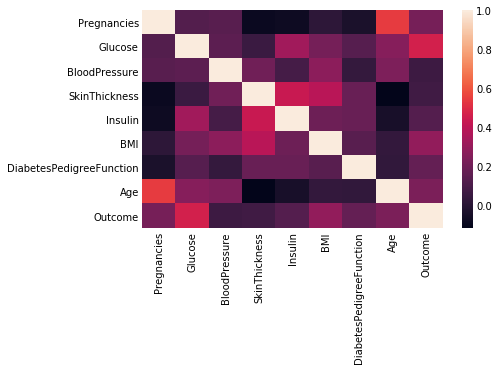

In [4]:
sns.heatmap(dataset.corr())

In [5]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [6]:
#separating the data
x_data=dataset.iloc[:,0:8].values
y_data=dataset.iloc[:,8:].values
#splitting the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,random_state=10)

In [7]:
#creating model
def model_creation(opt='adam',init='uniform'):
    model=Sequential()
    model.add(Dense(12,input_dim=8,kernel_initializer=init,activation='relu'))
    model.add(Dense(8,kernel_initializer=init,activation='relu'))
    model.add(Dense(8,kernel_initializer=init,activation='relu'))
    model.add(Dense(1,kernel_initializer=init,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
    return model

model=model_creation()
#we created 3 hidden layers and each input and output layer

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 293
Trainable params: 293
Non-trainable params: 0
_________________________________________________________________


In [9]:
#fitting our model 
values=model.fit(x_train,y_train,epochs=150,batch_size=10,verbose=1)

Epoch 1/150
576/576 [==============================] - 0s 395us/step - loss: 0.6899 - accuracy: 0.6580
Epoch 2/150
576/576 [==============================] - 0s 90us/step - loss: 0.6783 - accuracy: 0.6580
Epoch 3/150
576/576 [==============================] - 0s 83us/step - loss: 0.6644 - accuracy: 0.6580
Epoch 4/150
576/576 [==============================] - 0s 83us/step - loss: 0.6585 - accuracy: 0.6580
Epoch 5/150
576/576 [==============================] - 0s 83us/step - loss: 0.6547 - accuracy: 0.6580
Epoch 6/150
576/576 [==============================] - 0s 85us/step - loss: 0.6506 - accuracy: 0.6562
Epoch 7/150
576/576 [==============================] - 0s 106us/step - loss: 0.6451 - accuracy: 0.6562
Epoch 8/150
576/576 [==============================] - 0s 90us/step - loss: 0.6386 - accuracy: 0.6649
Epoch 9/150
576/576 [==============================] - 0s 97us/step - loss: 0.6310 - accuracy: 0.6806
Epoch 10/150
576/576 [==============================] - 0s 85us/step - loss: 0.6

576/576 [==============================] - 0s 97us/step - loss: 0.4859 - accuracy: 0.7778
Epoch 81/150
576/576 [==============================] - 0s 95us/step - loss: 0.4876 - accuracy: 0.7708
Epoch 82/150
576/576 [==============================] - 0s 83us/step - loss: 0.4819 - accuracy: 0.7708
Epoch 83/150
576/576 [==============================] - 0s 81us/step - loss: 0.4832 - accuracy: 0.7865
Epoch 84/150
576/576 [==============================] - 0s 81us/step - loss: 0.4846 - accuracy: 0.7830
Epoch 85/150
576/576 [==============================] - 0s 81us/step - loss: 0.4824 - accuracy: 0.7830
Epoch 86/150
576/576 [==============================] - 0s 83us/step - loss: 0.4789 - accuracy: 0.7847
Epoch 87/150
576/576 [==============================] - 0s 90us/step - loss: 0.4784 - accuracy: 0.7951
Epoch 88/150
576/576 [==============================] - 0s 97us/step - loss: 0.4798 - accuracy: 0.7882
Epoch 89/150
576/576 [==============================] - 0s 100us/step - loss: 0.4764 -

In [10]:
scores=model.evaluate(x_data,y_data)
print(model.metrics_names[1],scores[1]*100)

768/768 [==============================] - 0s 42us/step
accuracy 78.125


In [11]:
#predicying our model on test data
y_predict=model.predict(x_test,batch_size=10)
y_predicted_labes=[]

In [12]:
#changing outputs in the last layer in network
for i in range(len(y_predict)):
    if y_predict[i]>=0.5:
        y_predicted_labes.append(1)
    else:
        y_predicted_labes.append(0)

In [13]:
# analysing the results
print(confusion_matrix(y_test,y_predicted_labes))
print(classification_report(y_test,y_predicted_labes))

[[103  18]
 [ 37  34]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       121
           1       0.65      0.48      0.55        71

    accuracy                           0.71       192
   macro avg       0.69      0.67      0.67       192
weighted avg       0.71      0.71      0.70       192



In [14]:
#keys in model
print(values.history.keys())

dict_keys(['loss', 'accuracy'])


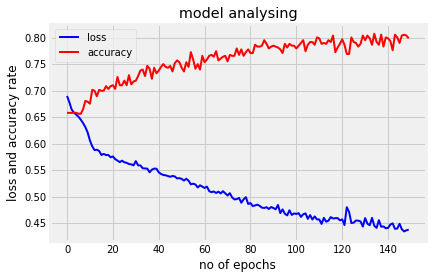

In [19]:
#plotting accuracy and loss 
plt.plot(values.history["loss"],color="blue",linewidth=2)
plt.plot(values.history["accuracy"],color="red",linewidth=2)
plt.xlabel("no of epochs")
plt.ylabel("loss and accuracy rate")
plt.title("model analysing")
plt.legend(["loss","accuracy"],loc="upper left")
plt.show()

# Evaluating our model with StratifiedKfold and Cross val score

In [16]:
#importing required modules
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score

In [17]:
model2=KerasClassifier(build_fn=model_creation,epochs=150,batch_size=10,verbose=1)
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=5)
results=cross_val_score(model2,x_data,y_data,cv=kfold,n_jobs=3)
print(f"accuracy ==>{results} , mean accuracy is{results.mean()}")

accuracy ==>[0.75324672 0.74025977 0.71428573 0.77922076 0.67532468 0.87012988
 0.72727275 0.75324672 0.72368419 0.78947371] , mean accuracy is0.7526144921779633
